##Importing the needed Libraries


In [21]:
#Import all libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt

##2. Data Loading

In [3]:
#Load dataset
df = pd.read_csv('/content/sample_sales_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
#How many null values exist?
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

# Descriptive Satistics
In this section, we aim to provide a descriptive overview of the dataset, including details on the columns, the presence of null values, and the data types of each column.

Here's a brief explanation of the column names:

1.transaction_id: a unique identifier assigned to each transaction.

2.timestamp: the date and time when the transaction was made.

3.product_id: a unique identifier assigned to the product sold.

4.category: the category to which the product belongs.

5.customer_type: the type of customer who made the transaction.

6.unit_price: the price for one unit of the item.

7.quantity: the number of units sold in the transaction.

8.total: the total amount payable by the customer.

9.payment_type: the method of payment used by the customer.


To gain insights into the numerical columns, we'll compute descriptive statistics such as the mean, median, and count.

Let's proceed to analyze the dataset.

In [6]:
#What data typeS exists within each column?
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [7]:
df.describe(include='all')


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
count,7829,7829,7829,7829,7829,7829.000000,7829.000000,7829.000000,7829
unique,7829,7738,300,22,5,NaN,NaN,NaN,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,NaN,NaN,NaN,cash
freq,1,2,114,998,1601,NaN,NaN,NaN,2027
mean,NaN,NaN,NaN,NaN,NaN,7.819480,2.501597,19.709905,NaN
std,NaN,NaN,NaN,NaN,NaN,5.388088,1.122722,17.446680,NaN
min,NaN,NaN,NaN,NaN,NaN,0.190000,1.000000,0.190000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.990000,1.000000,6.570000,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.190000,3.000000,14.970000,NaN
75%,NaN,NaN,NaN,NaN,NaN,11.190000,4.000000,28.470000,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


# Histogram

<Axes: ylabel='Frequency'>

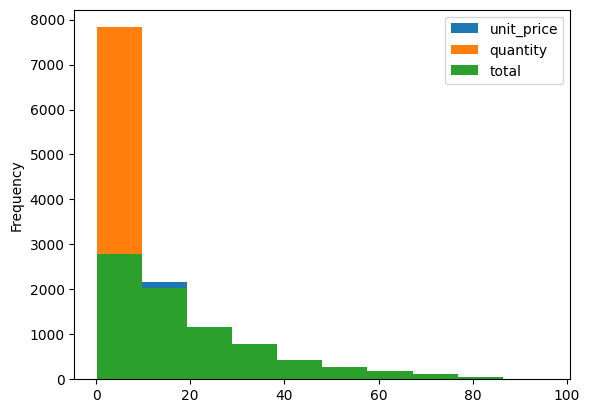

In [24]:
df.plot(kind='hist', bins=10)

# Box plot

<Axes: >

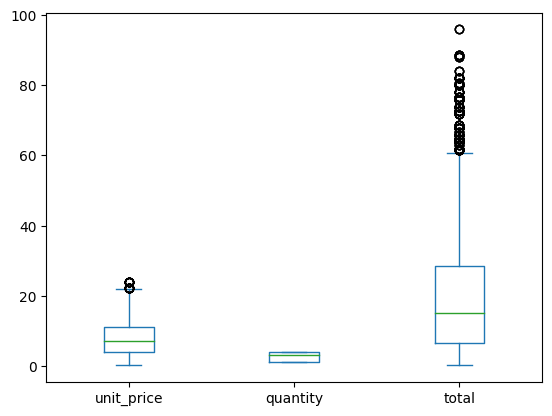

In [31]:
df.plot(kind = 'box')

In [28]:

def plot_continuous_distribution(data: pd.DataFrame = None, column: list = None, height: int = 5):
  for i in column:
    sns.displot(data, x=i, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)


# Visualization

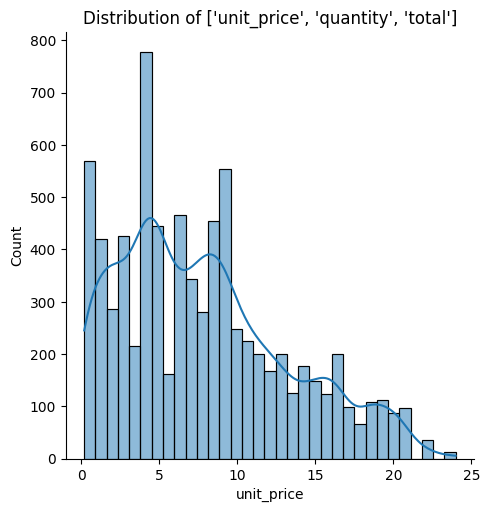

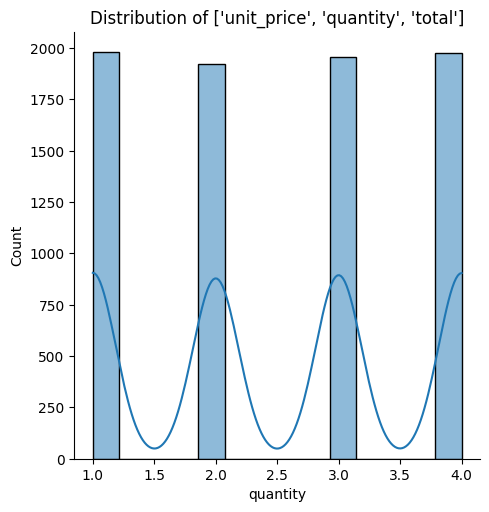

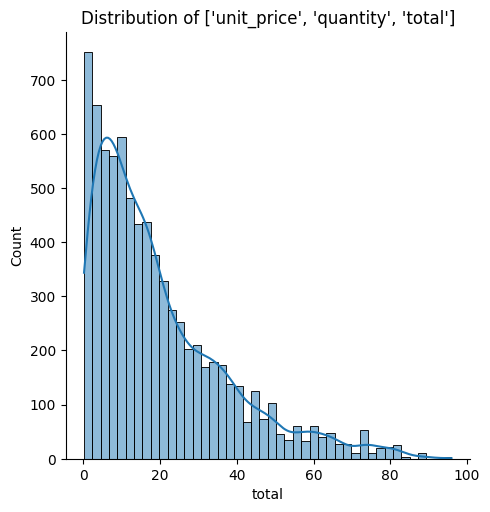

In [29]:
plot_continuous_distribution(df, ['unit_price', 'quantity', 'total'])

<ipython-input-18-818003120e90>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', palette='Set2').set(title=f'Distribution of Category')


[Text(0.5, 1.0, 'Distribution of Category')]

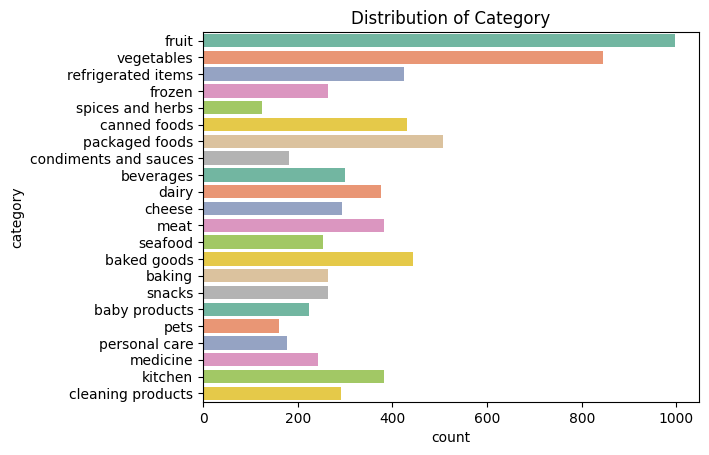

In [18]:
sns.countplot(data=df, y='category', palette='Set2').set(title=f'Distribution of Category')

<ipython-input-28-355e3254c893>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


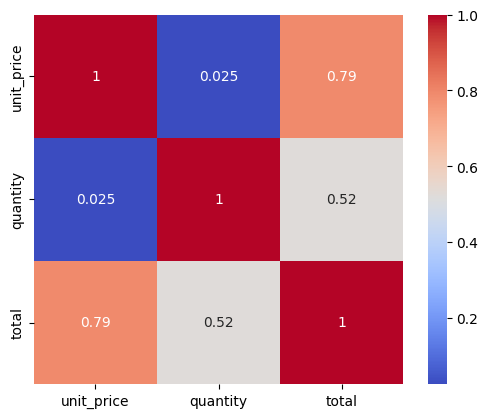

In [30]:

# Correlation plot
correlation_plot(df)

# Summary

After conducting an initial exploratory data analysis on the provided sample, it's evident that we've gained some insights into the dataset. However, in order to address the client's inquiry on how to optimize their stock management strategy, several key steps need to be taken:

Increase Data Volume: The current sample size is limited to data from a single store and a week's worth of transactions. To derive more robust conclusions and patterns, we need to collect data from a larger timeframe and potentially from multiple stores.

Refine Problem Statement: The client's inquiry regarding better stock management is broad. To provide actionable insights, we must narrow down the focus by framing a specific problem statement. This could involve identifying specific products or categories with high demand variability or exploring optimal inventory levels based on seasonal trends.

Expand Feature Set: To enhance our analysis and predictive capabilities, we need to augment the dataset with additional relevant features. These could include factors such as supplier information, historical sales data, external market trends, or demographic information of the customer base.

By addressing these steps, we can move forward with a more comprehensive approach to optimizing the client's stock management strategy, ultimately delivering a more valuable end product tailored to their specific needs.